# Importation des bibliotheques

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import  statsmodels.api as sm

# Importtaion et lecture du data

In [3]:
#importation du data
data=pd.read_csv("50_Startups.csv")
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


# Description statistique des donnees 

In [4]:
#dimension de la BD
data.shape

(50, 5)

In [5]:
#afficher divers info sur la BD
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [6]:
#afficher le count, mean, stf, quantiles etc...
data.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [7]:
#afficher les nom des colonnes
cols=data.columns
cols

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [8]:
#le quantile a 25%
p=np.percentile(data["R&D Spend"],25)

39936.369999999995

In [ ]:
p

# Creation des figures statisique pour chercher les relations entre les variables 

C:\Users\nessrine\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


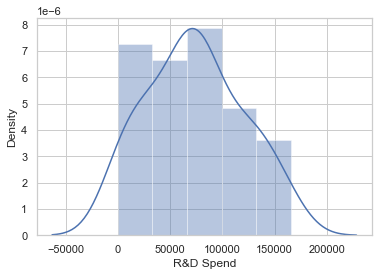

In [10]:
#afficher l'histogramme de la colonne de R&D Spend
sns.distplot(data["R&D Spend"])

C:\Users\nessrine\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


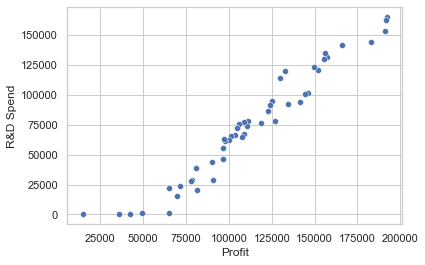

In [11]:
#avoir une idée sur la relation entre R&D Spend et Profit ==> lineaire
sns.scatterplot(data.Profit,data["R&D Spend"])

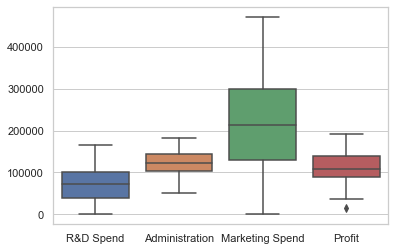

In [12]:
#visualisation des données
sns.boxplot(data=data)

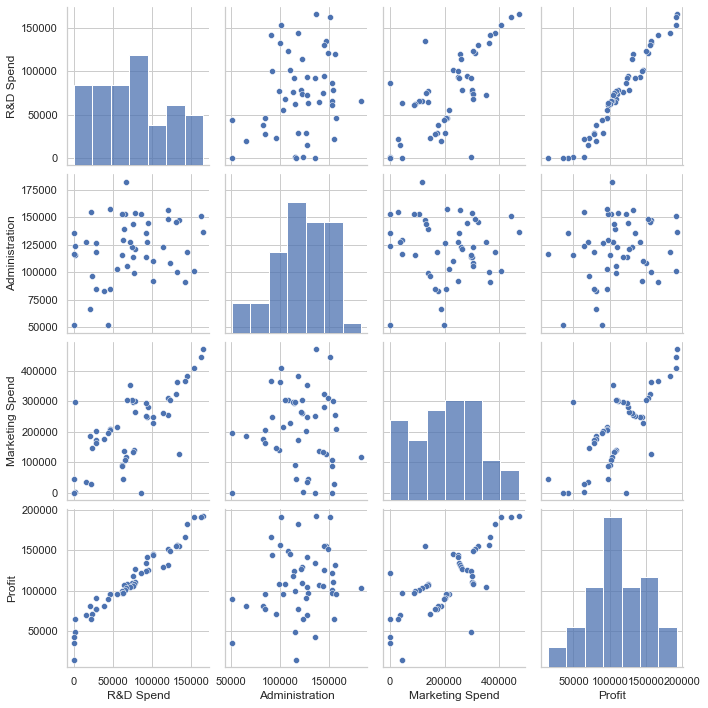

In [13]:
#relation entre differentes colonnes
sns.pairplot(data)

In [14]:
#utilisation du correlation pearson
data.corr(method="pearson")

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


# Creation des features et target relative aux donnees 

In [15]:
x=data.iloc[:,0:4]
x

,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.80,471784.10,New York
1,162597.70,151377.59,443898.53,California
2,153441.51,101145.55,407934.54,Florida
3,144372.41,118671.85,383199.62,New York
4,142107.34,91391.77,366168.42,Florida
5,131876.90,99814.71,362861.36,New York
6,134615.46,147198.87,127716.82,California
7,130298.13,145530.06,323876.68,Florida
8,120542.52,148718.95,311613.29,New York
9,123334.88,108679.17,304981.62,California


In [16]:
y=data.iloc[:,4:5]

In [17]:
y

,Profit
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94
5,156991.12
6,156122.51
7,155752.60
8,152211.77
9,149759.96


# Encodages des features categoriques 

In [19]:
#convertir tout ce qui est categorique en binaire
x=pd.get_dummies(x,drop_first=True)
x

,R&D Spend,Administration,Marketing Spend,State_Florida,State_New York
0,165349.20,136897.80,471784.10,0,1
1,162597.70,151377.59,443898.53,0,0
2,153441.51,101145.55,407934.54,1,0
3,144372.41,118671.85,383199.62,0,1
4,142107.34,91391.77,366168.42,1,0
5,131876.90,99814.71,362861.36,0,1
6,134615.46,147198.87,127716.82,0,0
7,130298.13,145530.06,323876.68,1,0
8,120542.52,148718.95,311613.29,0,1
9,123334.88,108679.17,304981.62,0,0


# Normalisation des features (features scaling)

In [22]:
z=data.Profit

In [23]:
z.skew()

0.023291019769116614

In [24]:
z.kurtosis()

-0.06385888546853113

In [25]:
#recalibre les données pour des répartitions normales
st_x= StandardScaler()

In [26]:
st_x=st_x.fit_transform(x)

In [27]:
x=st_x

# Decomposition des donnees en test_set et train_set

In [28]:
#decomposer la base de donné a des valeurs de test et des valeurs de train
x_train,x_test=train_test_split(x,test_size=0.20,random_state=0)

In [31]:
y_train,y_test=train_test_split(y,test_size=0.20,random_state=0)

In [33]:
#ce model cherche à établir une relation linéaire
regressor= LinearRegression()

In [34]:
regressor.fit(x_train,y_train)
regressor.score(x_train,y_train)

0.9501847627493606

In [35]:
y_pred =regressor.predict(x_test)

In [36]:
y_pred

array([[103015.20159796],
       [132582.27760816],
       [132447.73845174],
       [ 71976.09851258],
       [178537.48221055],
       [116161.24230165],
       [ 67851.69209676],
       [ 98791.73374687],
       [113969.43533012],
       [167921.0656955 ]])

In [37]:
#la coefficient de détermination linéaire 
r2_score(y_pred,y_test)

0.9293749209318112

In [38]:
x

array([[ 2.01641149e+00,  5.60752915e-01,  2.15394309e+00,
        -6.85994341e-01,  1.39326109e+00],
       [ 1.95586034e+00,  1.08280658e+00,  1.92360040e+00,
        -6.85994341e-01, -7.17740563e-01],
       [ 1.75436374e+00, -7.28257028e-01,  1.62652767e+00,
         1.45773797e+00, -7.17740563e-01],
       [ 1.55478369e+00, -9.63646307e-02,  1.42221024e+00,
        -6.85994341e-01,  1.39326109e+00],
       [ 1.50493720e+00, -1.07991935e+00,  1.28152771e+00,
         1.45773797e+00, -7.17740563e-01],
       [ 1.27980001e+00, -7.76239071e-01,  1.25421046e+00,
        -6.85994341e-01,  1.39326109e+00],
       [ 1.34006641e+00,  9.32147208e-01, -6.88149930e-01,
        -6.85994341e-01, -7.17740563e-01],
       [ 1.24505666e+00,  8.71980011e-01,  9.32185978e-01,
         1.45773797e+00, -7.17740563e-01],
       [ 1.03036886e+00,  9.86952101e-01,  8.30886909e-01,
        -6.85994341e-01,  1.39326109e+00],
       [ 1.09181921e+00, -4.56640246e-01,  7.76107440e-01,
        -6.85994341e-01

In [39]:
x=sm.add_constant(x)

In [40]:
x

array([[ 1.00000000e+00,  2.01641149e+00,  5.60752915e-01,
         2.15394309e+00, -6.85994341e-01,  1.39326109e+00],
       [ 1.00000000e+00,  1.95586034e+00,  1.08280658e+00,
         1.92360040e+00, -6.85994341e-01, -7.17740563e-01],
       [ 1.00000000e+00,  1.75436374e+00, -7.28257028e-01,
         1.62652767e+00,  1.45773797e+00, -7.17740563e-01],
       [ 1.00000000e+00,  1.55478369e+00, -9.63646307e-02,
         1.42221024e+00, -6.85994341e-01,  1.39326109e+00],
       [ 1.00000000e+00,  1.50493720e+00, -1.07991935e+00,
         1.28152771e+00,  1.45773797e+00, -7.17740563e-01],
       [ 1.00000000e+00,  1.27980001e+00, -7.76239071e-01,
         1.25421046e+00, -6.85994341e-01,  1.39326109e+00],
       [ 1.00000000e+00,  1.34006641e+00,  9.32147208e-01,
        -6.88149930e-01, -6.85994341e-01, -7.17740563e-01],
       [ 1.00000000e+00,  1.24505666e+00,  8.71980011e-01,
         9.32185978e-01,  1.45773797e+00, -7.17740563e-01],
       [ 1.00000000e+00,  1.03036886e+00,  9.869

In [55]:
#un autre model cherche à établir une relation linéaire
model= sm.OLS(y,x).fit()

In [56]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Thu, 30 Sep 2021   Prob (F-statistic):           1.34e-27
Time:                        16:43:40   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        1.12e+05   1334.905     83.911      0.000    1.09e+05    1.15e+05
x1          3.663e+04   2108.775     17.369      0.000    3.24e+04    4.09e+04
x2          -748.9975   1448.705     -0.517      0.608   -3668.671    2170.676
x3          3266.2152   2075.251      1.574      0.123    -916.178    7448.608
x4            92.7302   1572.494      0.059      0.953   -3076.424    3261.885
x5           -19.8422   1542.414     -0.013      0.990   -3128.374    3088.690
==============================================================================
Omnibus:                       14.782   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.266
Skew:                          -0.948   Prob(JB):                     2.41e-05
Kurtosis:                       5.572   Cond. No.                         2.89
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [57]:
#afficher les constantes pour formater la data
model.pvalues

const    3.369385e-50
x1       2.578772e-21
x2       6.077373e-01
x3       1.226769e-01
x4       9.532429e-01
x5       9.897941e-01
dtype: float64

In [58]:
#on supprime toute constante superieur à 0.5
x=np.delete(x,2,1)

In [59]:
x

array([[ 1.00000000e+00,  2.01641149e+00,  2.15394309e+00,
        -6.85994341e-01,  1.39326109e+00],
       [ 1.00000000e+00,  1.95586034e+00,  1.92360040e+00,
        -6.85994341e-01, -7.17740563e-01],
       [ 1.00000000e+00,  1.75436374e+00,  1.62652767e+00,
         1.45773797e+00, -7.17740563e-01],
       [ 1.00000000e+00,  1.55478369e+00,  1.42221024e+00,
        -6.85994341e-01,  1.39326109e+00],
       [ 1.00000000e+00,  1.50493720e+00,  1.28152771e+00,
         1.45773797e+00, -7.17740563e-01],
       [ 1.00000000e+00,  1.27980001e+00,  1.25421046e+00,
        -6.85994341e-01,  1.39326109e+00],
       [ 1.00000000e+00,  1.34006641e+00, -6.88149930e-01,
        -6.85994341e-01, -7.17740563e-01],
       [ 1.00000000e+00,  1.24505666e+00,  9.32185978e-01,
         1.45773797e+00, -7.17740563e-01],
       [ 1.00000000e+00,  1.03036886e+00,  8.30886909e-01,
        -6.85994341e-01,  1.39326109e+00],
       [ 1.00000000e+00,  1.09181921e+00,  7.76107440e-01,
        -6.85994341e-01

In [60]:
model= sm.OLS(y,x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     215.8
Date:                Thu, 30 Sep 2021   Prob (F-statistic):           9.72e-29
Time:                        16:43:42   Log-Likelihood:                -525.53
No. Observations:                  50   AIC:                             1061.
Df Residuals:                      45   BIC:                             1071.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        1.12e+05   1323.993     84.602      0.000    1.09e+05    1.15e+05
x1           3.62e+04   1928.741     18.771      0.000    3.23e+04    4.01e+04
x2          3601.6435   1955.116      1.842      0.072    -336.162    7539.449
x3            65.6738   1558.776      0.042      0.967   -3073.863    3205.210
x4            -9.2484   1529.671     -0.006      0.995   -3090.164    3071.667
==============================================================================
Omnibus:                       14.640   Durbin-Watson:                   1.257
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.037
Skew:                          -0.938   Prob(JB):                     2.70e-05
Kurtosis:                       5.565   Cond. No.                         2.60
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [61]:
x=np.delete(x,1,1)

In [62]:
model= sm.OLS(y,x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.562
Model:                            OLS   Adj. R-squared:                  0.534
Method:                 Least Squares   F-statistic:                     19.71
Date:                Thu, 30 Sep 2021   Prob (F-statistic):           2.32e-08
Time:                        16:43:43   Log-Likelihood:                -579.99
No. Observations:                  50   AIC:                             1168.
Df Residuals:                      46   BIC:                             1176.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        1.12e+05   3891.322     28.785      0.000    1.04e+05     1.2e+05
x1          3.002e+04   3988.926      7.525      0.000     2.2e+04     3.8e+04
x2          -557.2431   4580.329     -0.122      0.904   -9776.967    8662.481
x3          1987.9409   4484.936      0.443      0.660   -7039.767     1.1e+04
==============================================================================
Omnibus:                        3.720   Durbin-Watson:                   1.174
Prob(Omnibus):                  0.156   Jarque-Bera (JB):                2.973
Skew:                          -0.299   Prob(JB):                        0.226
Kurtosis:                       4.034   Cond. No.                         1.80
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [63]:
x=np.delete(x,2,1)

In [64]:
model= sm.OLS(y,x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.562
Model:                            OLS   Adj. R-squared:                  0.544
Method:                 Least Squares   F-statistic:                     30.20
Date:                Thu, 30 Sep 2021   Prob (F-statistic):           3.68e-09
Time:                        16:43:43   Log-Likelihood:                -580.00
No. Observations:                  50   AIC:                             1166.
Df Residuals:                      47   BIC:                             1172.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        1.12e+05   3850.321     29.092      0.000    1.04e+05     1.2e+05
x1          2.991e+04   3852.506      7.764      0.000    2.22e+04    3.77e+04
x2          2258.7563   3852.506      0.586      0.560   -5491.486       1e+04
==============================================================================
Omnibus:                        3.886   Durbin-Watson:                   1.175
Prob(Omnibus):                  0.143   Jarque-Bera (JB):                3.200
Skew:                          -0.303   Prob(JB):                        0.202
Kurtosis:                       4.081   Cond. No.                         1.03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [65]:
x=np.delete(x,2,1)

In [66]:
model= sm.OLS(y,x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     60.88
Date:                Thu, 30 Sep 2021   Prob (F-statistic):           4.38e-10
Time:                        16:43:44   Log-Likelihood:                -580.18
No. Observations:                  50   AIC:                             1164.
Df Residuals:                      48   BIC:                             1168.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        1.12e+05   3823.911     29.293      0.000    1.04e+05     1.2e+05
x1          2.984e+04   3823.911      7.803      0.000    2.21e+04    3.75e+04
==============================================================================
Omnibus:                        4.420   Durbin-Watson:                   1.178
Prob(Omnibus):                  0.110   Jarque-Bera (JB):                3.882
Skew:                          -0.336   Prob(JB):                        0.144
Kurtosis:                       4.188   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [67]:
x_train,x_test=train_test_split(x,test_size=0.20,random_state=0)

In [68]:
regressor.fit(x_train,y_train)
regressor.score(x_train,y_train)

0.5636026973161414

In [69]:
y_pred =regressor.predict(x_test)

In [70]:
y_pred

array([[ 88778.9258436 ],
       [121159.90937983],
       [116095.04844169],
       [100177.17840658],
       [160084.60190957],
       [146612.47683371],
       [105293.90694986],
       [ 81414.26971286],
       [134342.65952805],
       [149807.5080229 ]])

In [71]:
r2_score(y_pred,y_test)

-0.0030973944975580814